<a href="https://colab.research.google.com/github/dataskool/courses/blob/main/pystats/pystats_module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3 | Describing data distribution

The fundamental concept– your pathway to a range of applications of statistics in data science, machine learning, and all data-based decision-making.

## Learning objective

- The concept of data distribution
- Understanding the shape of a data distribution
- Getting familiar with constructing and drawing a histogram
- Being able to locate the center and spread of the distribution
- Identifying symmetric and asymmetric shapes

## Distributions to use

- Gaussian / Normal distribution
- Gamma
- Poisson
- Binomial


## Installing the libraries

Install or upgrade the libraries. Here we upgrade the polars library. Polars is a new library based in rust for much faster data wrangling compared to Pandas. The syntax of polars has similarity with PySpark and R's dplyr.



In [1]:
pip install -U "polars[all]" pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 968.3/968.3 kB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.6/739.6 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 25.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing met

In [2]:
# Checking the installed version of polars and pandas
import polars as pl
from polars import col, lit, when
import pandas as pd

import warnings
warnings.simplefilter('ignore')

print(pl.__version__)
print(pd.__version__)

0.20.14
2.2.1


## Graphically displaying data

- bar plot of univariate categorical data
- comparative bar plot of categorical data
- histogram of univariate numerical data

### Displaying categorical data

- univariate categorical data
- bivariate categorical data

First, let us generate synthetic data for our exercise. You can ask ChatGPT to generate one for you. But start with this one first to be familiar. They try a new data set for practice.

In [3]:
import numpy as np
import polars as pl

# Set random seed for reproducibility
np.random.seed(42)

# List of parties
list_party = ['Party 1', 'Party 2', 'Party 3', 'Party 4']

# Generate random data
data = {
    'ID': np.arange(1, 31),
    'Sex': np.random.choice(['Male', 'Female'], size=30),
    'Age': np.random.randint(18, 80, size=30),
    'Income (BDT)': np.random.randint(20000, 100000, size=30),
    'Political Affiliation': np.random.choice(list_party, size=30, p=[.4, .4, .15, .05])
}

# Create Polars DataFrame
df = pl.DataFrame(data)

In [4]:
# Display the DataFrame
df.head()

ID,Sex,Age,Income (BDT),Political Affiliation
i64,str,i64,i64,str
1,"""Male""",38,30627,"""Party 3"""
2,"""Female""",50,28792,"""Party 2"""
3,"""Male""",29,93969,"""Party 2"""
4,"""Male""",75,63001,"""Party 2"""
5,"""Male""",39,96552,"""Party 4"""


### Bar plot

Let us create the frequency distribution of Sex. This table shows the levels of the Sex variable (Males, Females) along with their frequencies. Frequency indicates how many times each of the `Male` and `Female` levels appear in the data.

In [5]:
# create a new data/table to store the frequency distribution

df_agg_sex = df.group_by('Sex').agg(
    col('Sex').count().alias('Count')
)

# Show the data
df_agg_sex

Sex,Count
str,u32
"""Female""",16
"""Male""",14


Now use a plotting library to draw the barplot. We use `seaborn` library. You could also use Matplotlib or other library of your choice. All the libraries should be able to do it but their syntax may slightly differ.

<Axes: xlabel='Sex', ylabel='Count'>

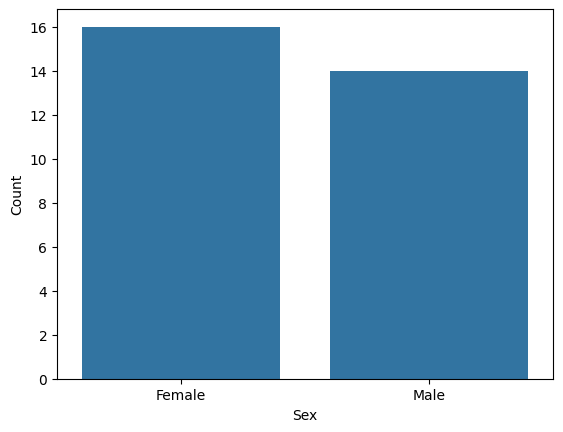

In [6]:
# Use aggregated data to draw the bar plot

import seaborn as sns

# aggregate it first and then draw the plot
df_agg_sex = df.group_by('Sex').agg(
    col('Sex').count().alias('Count')
)

sns.barplot( df_agg_sex, x='Sex', y='Count')

<Axes: xlabel='Sex', ylabel='count'>

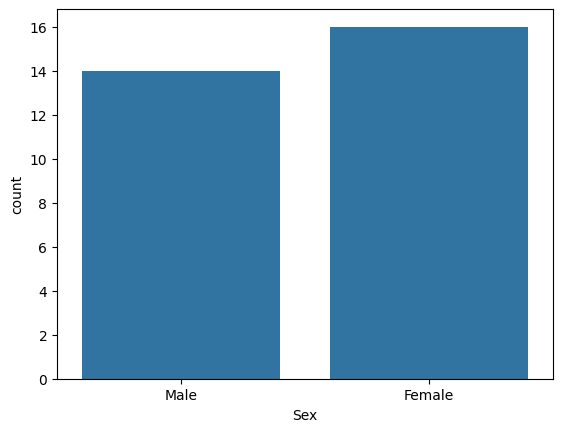

In [7]:
# You can also use the record-level data and draw the barplot
# without aggregating it first

sns.countplot(df, x='Sex', stat='count')

<Axes: xlabel='Sex'>

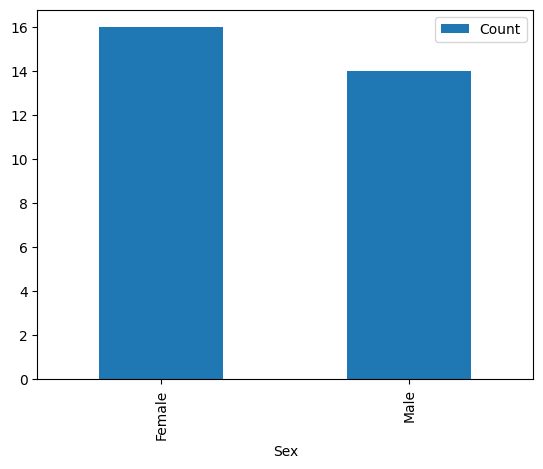

In [8]:
# You can do the same plot using Matplotlib
df_agg_sex.to_pandas().plot.bar(x='Sex', y = 'Count')

In [9]:
# If you want to plot the percentage instead of frequency
# you need to add that column to the data set

df_agg_sex = df.group_by('Sex').agg(
    col('Sex').count().alias('Count')
).with_columns(
    (col('Count')/col('Count').sum()).alias('Percent')
)

df_agg_sex

Sex,Count,Percent
str,u32,f64
"""Female""",16,0.533333
"""Male""",14,0.466667


<Axes: xlabel='Sex', ylabel='Percent'>

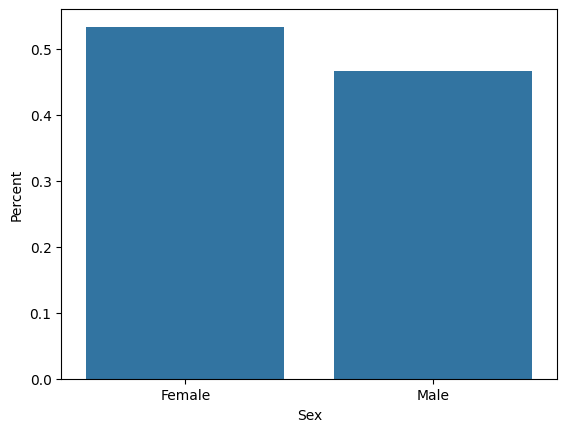

In [10]:
# Now plot the frequencies of each level of Sex
# Order the levels (by default, it puts smaller % first)
sns.barplot(
    df_agg_sex,
    x = 'Sex',
    y = 'Percent',
    order = ['Female', 'Male']
)

### Comparative bar plots

We want to construct a bar plot grouped by sexes. First let us draw a barplot for political affiliations.

<Axes: xlabel='Political Affiliation', ylabel='Count'>

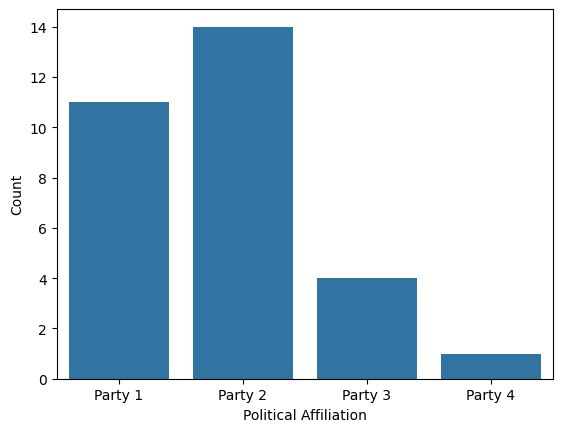

In [11]:
df_pol_aff = df.group_by('Political Affiliation').agg(
    col('Political Affiliation').count().alias('Count')
)

sns.barplot(
    df_pol_aff,
    x = 'Political Affiliation',
    y = 'Count', order = list_party
)

<Axes: xlabel='Political Affiliation', ylabel='count'>

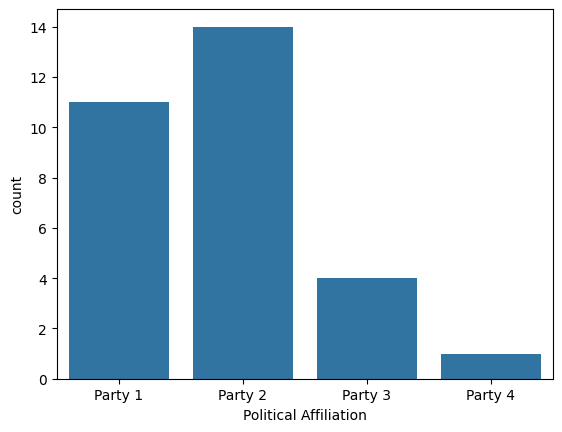

In [12]:
# We could also use the countplot method in seaborn to draw a barplot
sns.countplot(df, x = 'Political Affiliation', stat='count', order=list_party)

In [13]:
?sns.countplot

<Axes: xlabel='Political Affiliation', ylabel='probability'>

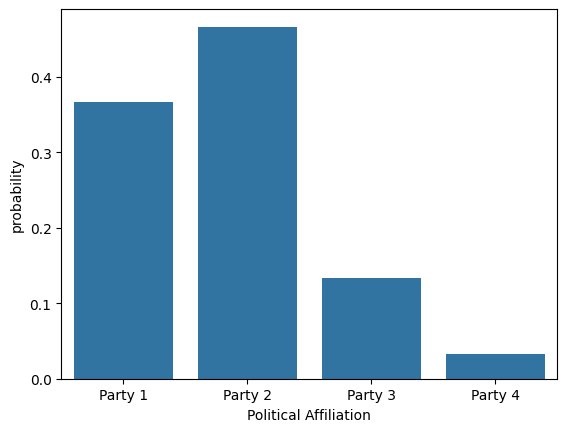

In [14]:
# Let's plot the relative frequency of each party
# I used the specific order here. You could change the order by explicitely setting the order yourself
# For example, to order as Party 2, Party 1, Party 3, Party 4
# use order = ['Party 2', 'Party 1', 'Party 3', 'Party 4']

sns.countplot(df, x = 'Political Affiliation', stat='probability', order=list_party)

<Axes: xlabel='Political Affiliation', ylabel='proportion'>

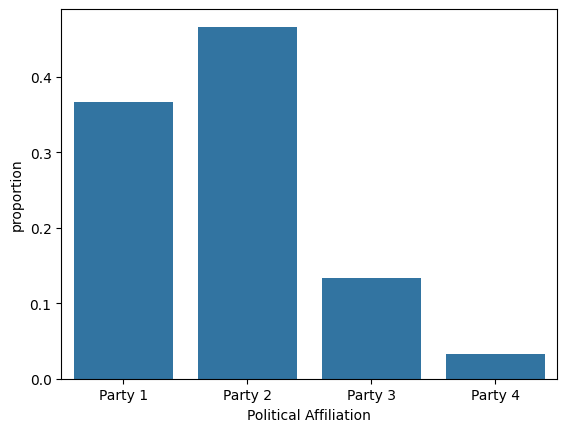

In [15]:
# Proportion and probability makes the same graph since there is only one category for each x-axis levels
sns.countplot(df, x = 'Political Affiliation', stat='proportion', order=list_party)

Now draw a comparative bar plot. In seaborn library, this is called countplot. It is still the bar plot as usual but we highlight the group or categories of another variable. This is done with the `hue` parameter.

In the following, we draw bar plot of political affiliation. But we also added the Sex to see how do the political affiliation compares between the sexes.

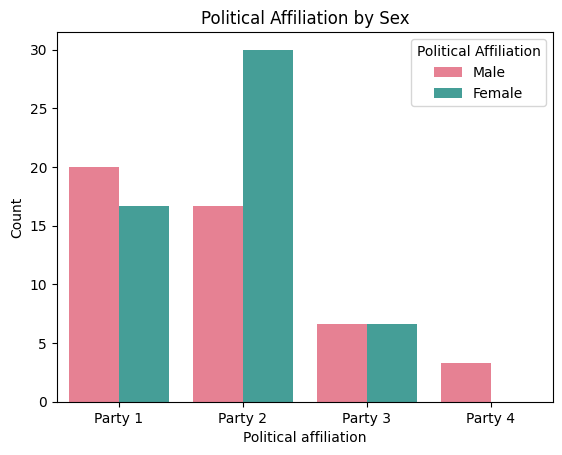

In [16]:
# Plot using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Political Affiliation', hue='Sex', palette='husl', stat='percent', order=list_party)

# Set labels and title
plt.xlabel('Political affiliation')
plt.ylabel('Count')
plt.title('Political Affiliation by Sex')

# Show plot
plt.legend(title='Political Affiliation')
plt.show()

<Axes: xlabel='Sex', ylabel='percent'>

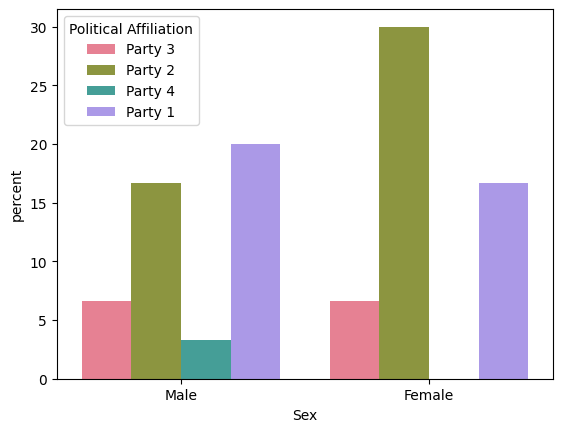

In [17]:
# How about plotting the sex and color by political affiliation?

sns.countplot(data=df, x='Sex', hue='Political Affiliation', palette='husl', stat='percent')

This is another way to look at it.

<Axes: xlabel='Sex', ylabel='probability'>

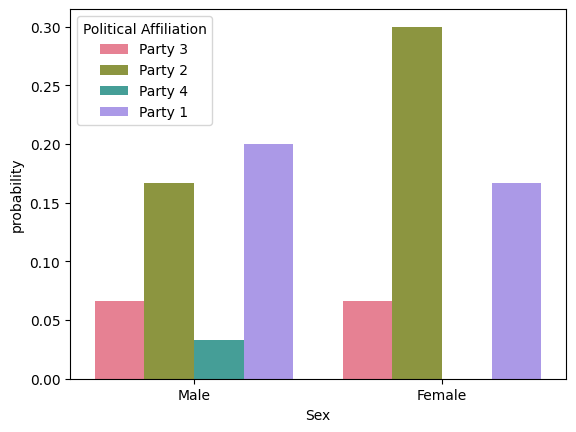

In [18]:
sns.countplot(data=df, x='Sex', hue='Political Affiliation', palette='husl', stat='probability')

<Axes: xlabel='Sex', ylabel='proportion'>

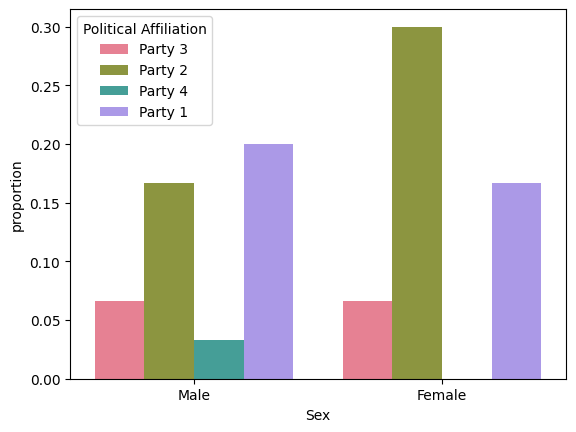

In [19]:
sns.countplot(data=df, x='Sex', hue='Political Affiliation', palette='husl', stat='proportion')

**Practical Example: Tech layoff**

In [ ]:
# import libraries

import polars as pl
from polars import col, lit, when
import pandas as pd

# Create the data set

layoffs = {
    'company': ['Google', 'Google', 'Microsoft', 'Microsoft', 'Meta', 'Meta'],
    'year': [2023, 2024, 2023, 2024, 2023, 2024],
    'layoffs' : [1200, 1000, 10000, 1900, 11000, 10000],
}

df_layoff = pl.DataFrame(layoffs)
df_layoff


company,year,layoffs
str,i64,i64
"""Google""",2023,1200
"""Google""",2024,1000
"""Microsoft""",2023,10000
"""Microsoft""",2024,1900
"""Meta""",2023,11000
"""Meta""",2024,10000


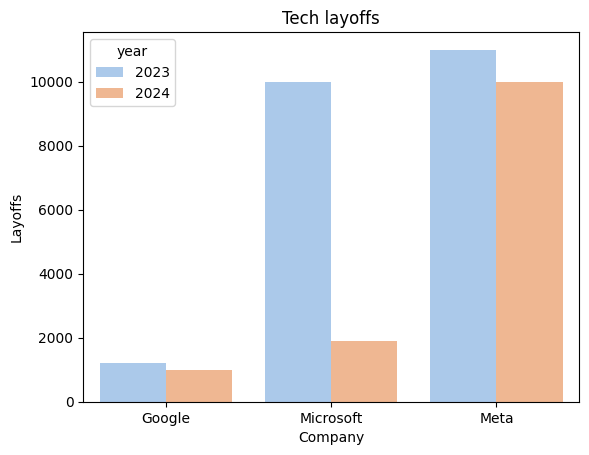

In [ ]:
# Barplot of aggreated data
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(df_layoff, x='company', y='layoffs', hue='year', palette='pastel')

# sns.barplot(df_layoff, x='company', y='layoffs', hue='year', palette=sns.color_palette('husl', 2))

# Set labels and title
plt.xlabel('Company')
plt.ylabel('Layoffs')
plt.title('Tech layoffs')

plt.show()

In [ ]:
?sns.barplot

## Histogram

### Sock sizes

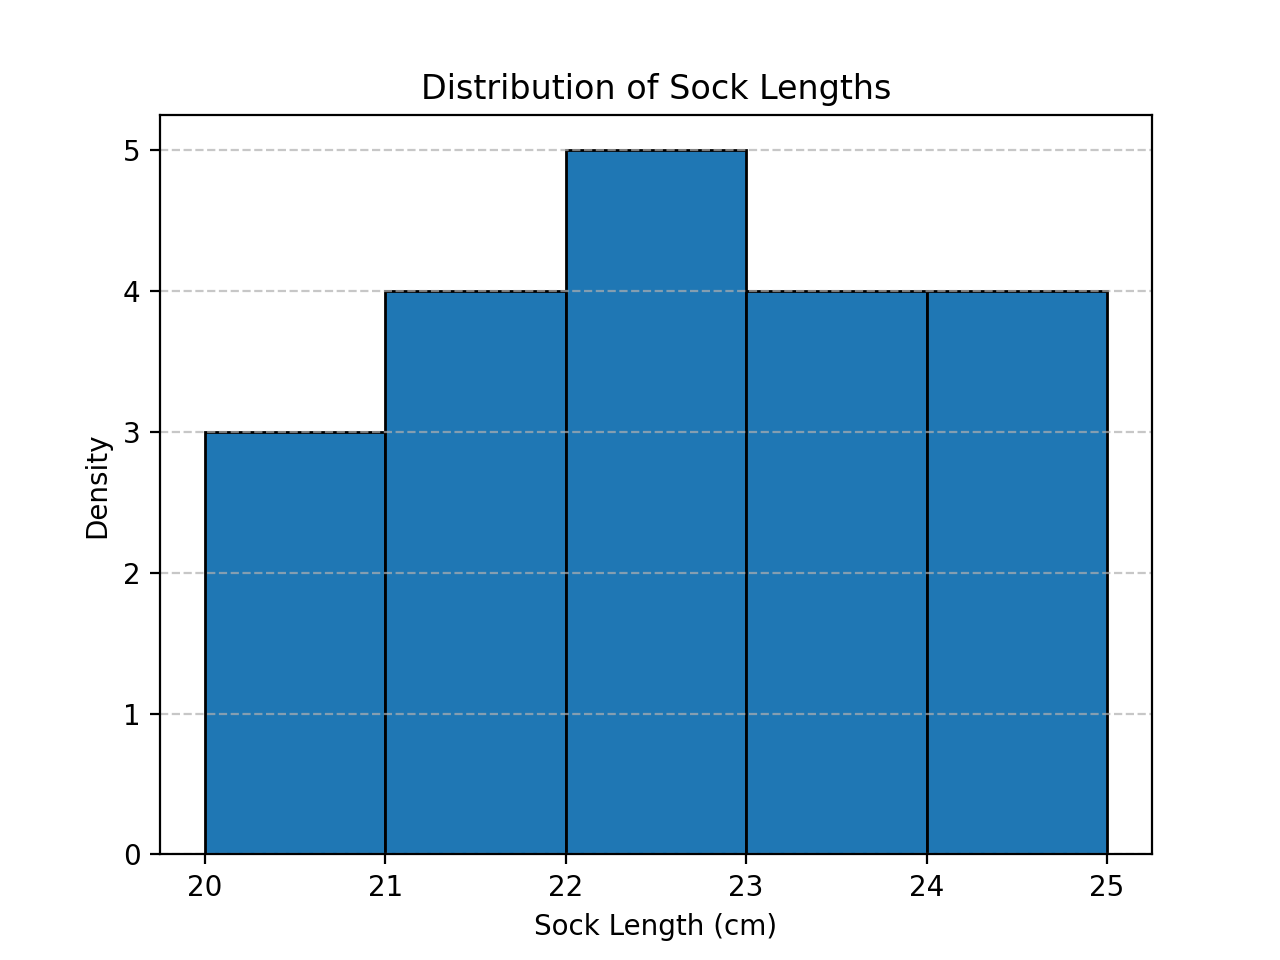

In [42]:
import matplotlib.pyplot as plt

# Data (sock lengths in cm)
sock_lengths = [22, 24, 23, 21, 25, 22, 20, 23, 21, 24, 20, 22, 21, 23, 20, 21, 22, 23, 22, 24]

# Create the histogram
# plt.hist(sock_lengths, bins=3, edgecolor='black', density=True)  # Adjust bins for better visualization
plt.hist(sock_lengths, bins=5, edgecolor='black')  # Adjust bins for better visualization

# Label the axes
plt.xlabel('Sock Length (cm)')
plt.ylabel('Density')

# Title the plot
plt.title('Distribution of Sock Lengths')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

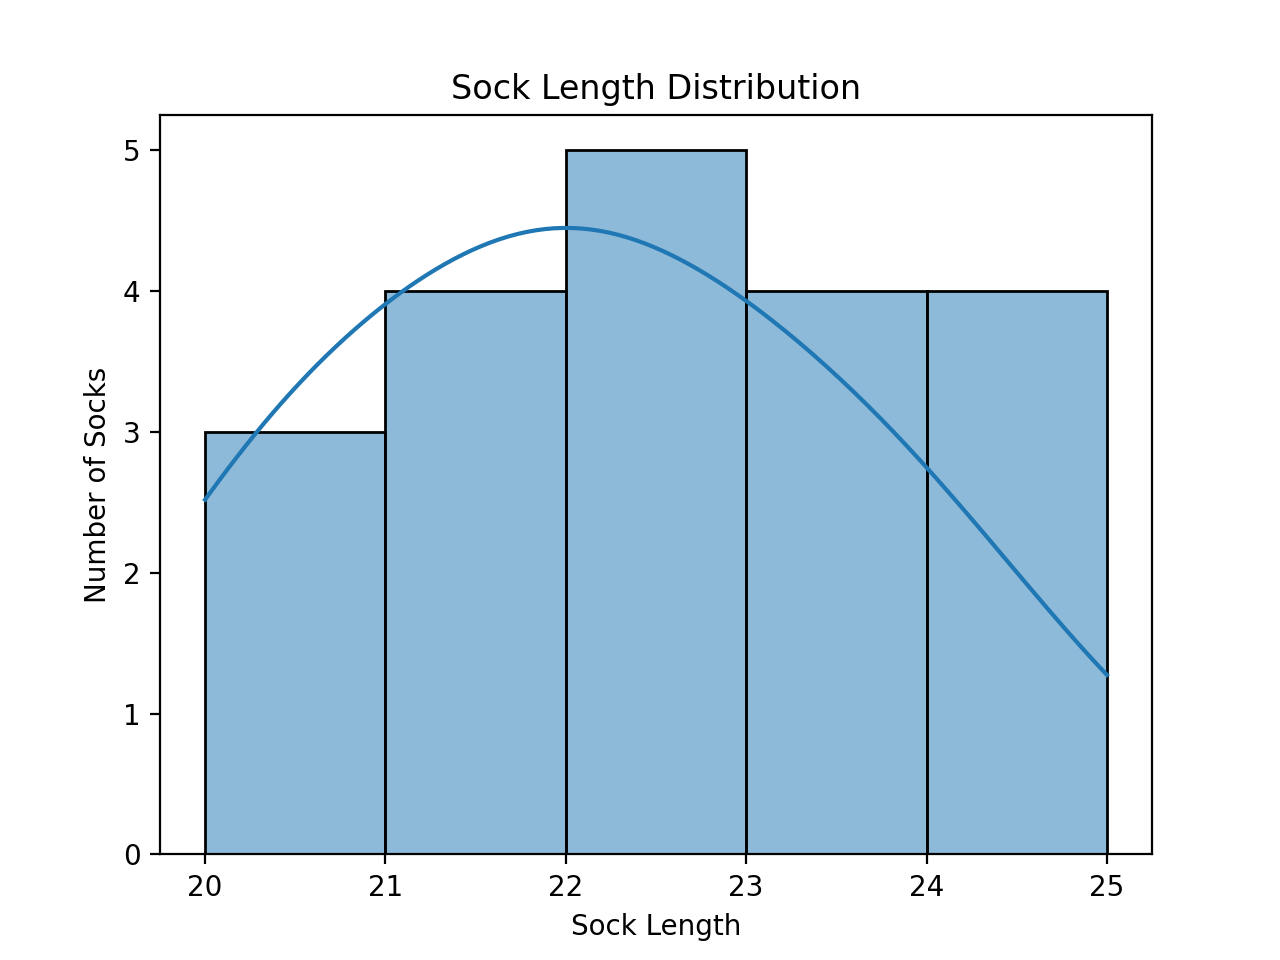

In [41]:
# Redraw the histogram with kde=True
# This will overlay a smooth curve over the bars

sns.histplot(sock_lengths, bins=5, kde=True)
plt.xlabel("Sock Length")
plt.ylabel("Number of Socks")
plt.title("Sock Length Distribution")
plt.show()

### Frequency, relative frequency and density histograms

In [54]:
# Generating random data for sock sizes (in inches)
np.random.seed(19) # For reproducibility
sock_sizes = np.random.normal(loc=10, scale=2, size=1000) # Assume average sock size is 10 inches with a standard deviation of 2


In [58]:
# Print the first 10 values of the data
sock_sizes[:10]

array([10.44200653,  9.31906998,  8.84450292,  9.19193689,  8.79342115,
        9.51229544, 12.07068748, 11.16150682, 10.50482747,  7.07490809])

In [55]:
# Generate random data for sock sizes
number_of_bins = 10  # You can change this value later to adjust the number of bins

# Recalculating bins based on the specified number of bins
new_bins = np.linspace(start=sock_sizes.min(), stop=sock_sizes.max(), num=number_of_bins + 1)
new_bin_labels = [f"{round(new_bins[i], 2)}-{round(new_bins[i+1], 2)}" for i in range(len(new_bins)-1)]

# Categorizing sock sizes into new bins
new_categories = pd.cut(sock_sizes, bins=new_bins, labels=new_bin_labels, right=False)

# Generating new frequency table
new_frequency_table = pd.value_counts(new_categories, sort=False).sort_index()

# Display the new frequency table
new_frequency_table


2.87-4.21        3
4.21-5.56        9
5.56-6.91       61
6.91-8.25      122
8.25-9.6       236
9.6-10.95      273
10.95-12.29    178
12.29-13.64     86
13.64-14.99     27
14.99-16.33      4
Name: count, dtype: int64

In [52]:
print(4.21-2.87)
print(14.99 - 13.64)

1.3399999999999999
1.3499999999999996


Now draw frequency, relateive frequency and density histograms.

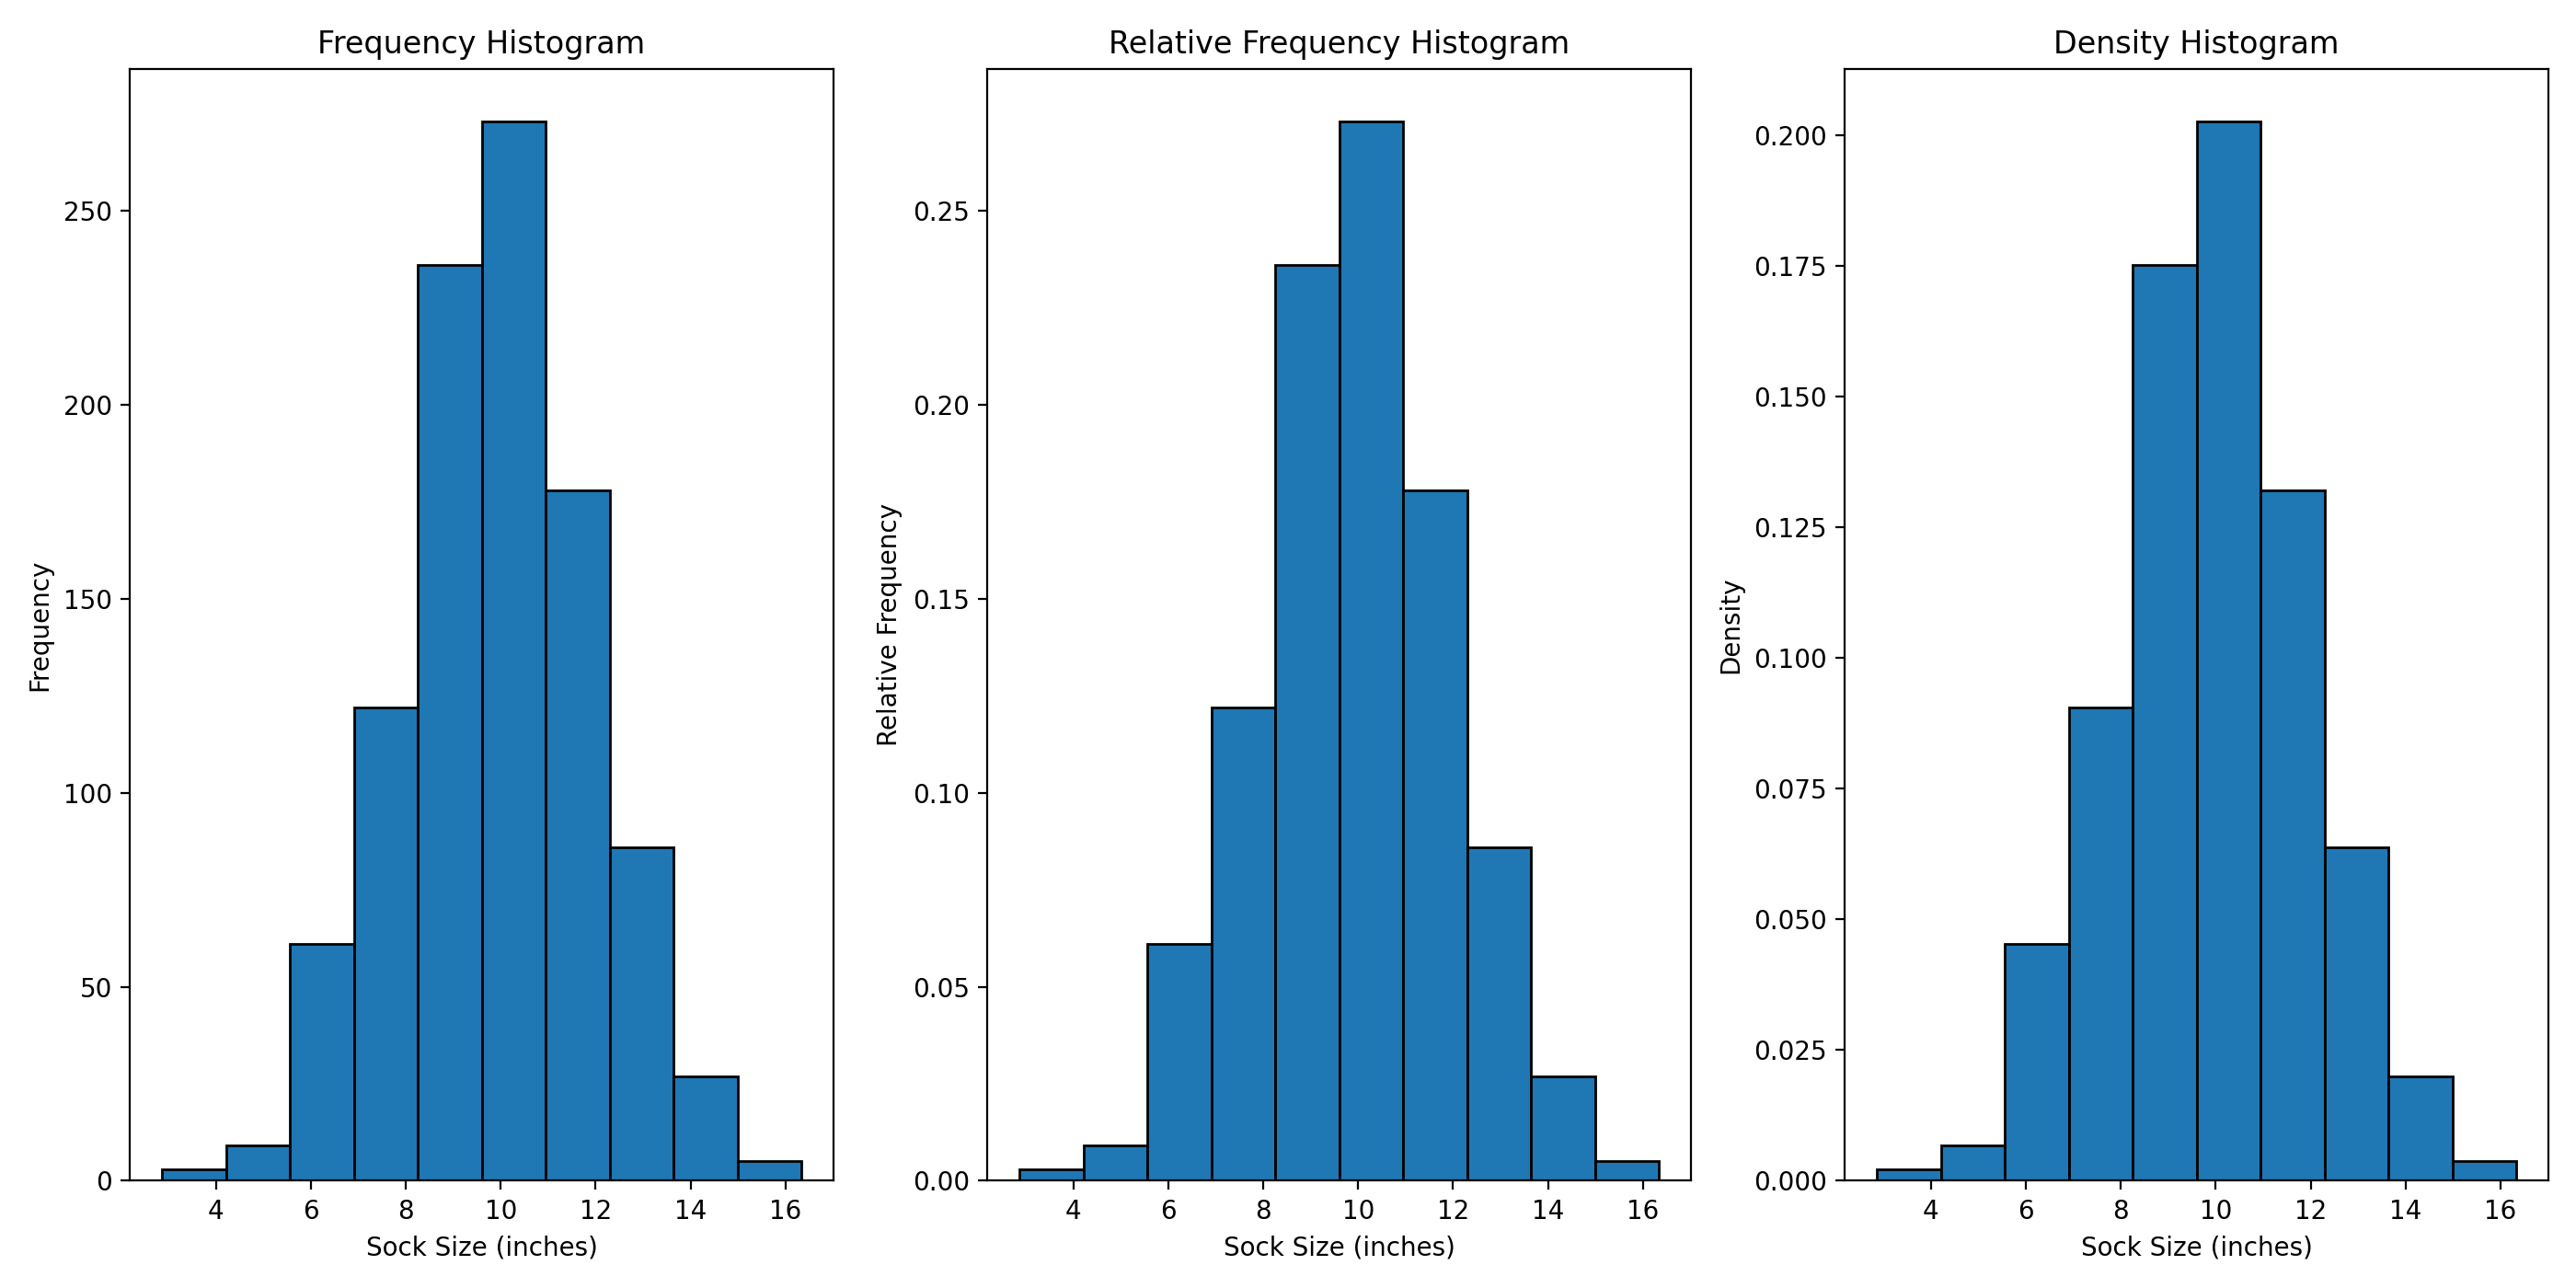

In [56]:

# Frequency Histogram
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.hist(sock_sizes, bins=number_of_bins, edgecolor='black')
plt.title('Frequency Histogram')
plt.xlabel('Sock Size (inches)')
plt.ylabel('Frequency')

# Relative Frequency Histogram
plt.subplot(1, 3, 2)
plt.hist(sock_sizes, bins=number_of_bins, weights=np.ones(len(sock_sizes)) / len(sock_sizes), edgecolor='black')
plt.title('Relative Frequency Histogram')
plt.xlabel('Sock Size (inches)')
plt.ylabel('Relative Frequency')

# Density Histogram
plt.subplot(1, 3, 3)
plt.hist(sock_sizes, bins=number_of_bins, density=True, edgecolor='black')
plt.title('Density Histogram')
plt.xlabel('Sock Size (inches)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()